# Lab 4 Worksheet

**Name:**

**Learning Objectives:**

- Identify types of objects
- Use Python help to learn to use unfamiliar functions
- Use Python debugger

## Objects and Types

### Exercise 1

Use the `type` command to find the type of each of the following after importing `numpy` as `np`.
```python
np
np.sum
np.array
np.array([3,4,5])
np.array([3,4,5]).sum
np.array([3,4,5]).sum()
type(np.array([3,4,5]).sum())
```


In [9]:
import numpy as np
print(type(np))
print(type(np.sum))
print(type(np.array))
print(type(np.array([3,4,5])))
print(type(np.array([3,4,5]).sum))
print(type(np.array([3,4,5]).sum()))
print(type(type(np.array([3,4,5]).sum())))

<class 'module'>
<class 'function'>
<class 'builtin_function_or_method'>
<class 'numpy.ndarray'>
<class 'builtin_function_or_method'>
<class 'numpy.int32'>
<class 'type'>


### Exercise 2

Consider the code
```python
def f(x):
    return 3*x
d={3:[f,[4,f],'hi'],4:{3,2}}
```

By inspection only, without using the `type` command, identify the type of each of the following
```python
d
d[3]
d[3][0]
d[3][0](3)
d[3][-1]
d[4]
```
Check your answer using the `type` command.


dict
list
function
int
string
set

In [11]:
def f(x):
    return 3*x
d={3:[f,[4,f],'hi'],4:{3,2}}

print(type(d))
print(type(d[3]))
print(type(d[3][0]))
print(type(d[3][0](3)))
print(type(d[3][-1]))
print(type(d[4]))

<class 'dict'>
<class 'list'>
<class 'function'>
<class 'int'>
<class 'str'>
<class 'set'>


## Reading Python Help to Understand Unfamiliar Code

### Exercise 3
Without running the code.

- Identify all the objects in the following segment of code 
- Use Python help to deduce the type of each object 
- Use Python help to predict the output

```python
import pandas as pd
import matplotlib.pyplot as plt

data=[['JKP 102',20153,'M',0.8],['JKP 102',20153,'T',0.7],['JKP 104',20153,'M',0.6]]
df=pd.DataFrame(data,columns=['Room','Term','Day','Utilization'])

(df.query("Term==20153 & Day=='M'")
         .sort_values(['Room'])
         .plot(x='Room',y='Utilization',by='Day',kind='bar',title='Plot',figsize=(8,4),ylim=(0,1),legend=False)
)
plt.show()
```

After you are done, run the code to verify your answers.


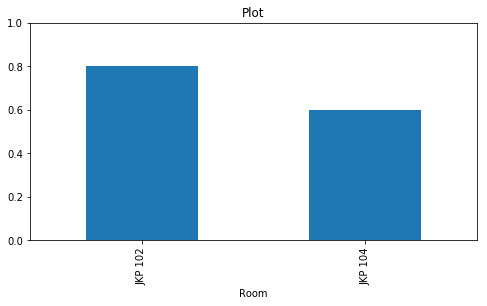

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data=[['JKP 102',20153,'M',0.8],['JKP 102',20153,'T',0.7],['JKP 104',20153,'M',0.6]]
df=pd.DataFrame(data,columns=['Room','Term','Day','Utilization'])

(df.query("Term==20153 & Day=='M'")
         .sort_values(['Room'])
         .plot(x='Room',y='Utilization',by='Day',kind='bar',title='Plot',figsize=(8,4),ylim=(0,1),legend=False)
)
plt.show()

## Using the Python Debugger


In [ ]:
# Code demonstration



### Exercise 3
Use `pdb.set_trace()` to identify the bug in the following code from Lab 3.

In [18]:
def convert(inputTime):
    try:
        hh,mm,ss=str(InputTime).split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans
convert('18:00:00')

nan

**Bug:**


### Exercise 4
Use `%pdb on` to turn on automatic debugging upon error and figure out what's wrong in the following code from Lab 3.

In [17]:
#Importing packages
import pandas as pd
import numpy as np

#Reading excel files
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
master=schedule.append(cancelled)
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

roomSet=set(capacities.Room)      # Create a set which contains the rooms in the capacities file.
ans={}                   # Initialize a dictionary to store the result we want

df=master 
master.head()           # Print the first few lines of the DataFrame master, which we loaded above. See index on the left, and each row

# Iterate through the rows of the data frame above. The variable "row" will go through the rows of the dataframe. "index" will go through the indices (see left above)
for index,row in df.iterrows():   
    term=row['Term']       # Obtain the corresponding column of each row
    room=row['First Room']
    days=row['First Days'] 
    beg=convert(row['First Begin Time'])   # Convert the begin time strings into decimal numbers using challenge 1
    end=convert(row['First End Time'])     # Convert the begin time strings into decimal numbers using challenge 1
    # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
    for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
        if day in days: 
            key=(term,room,day)  # The key of the dictionary to set
            if key not in ans:   # if this key is not in the dictionary, add it, with the beg and end time of the current row
                ans[key]=(beg,end)   
            else:
                oldBeg,oldEnd=ans[key]  # If the key is in the dictionary, update it to find the earliest beg time so far and latest end time
                newBeg=min(beg,oldBeg)
                newEnd=max(end,oldEnd)
                ans[key]=(newBeg,newEnd)
ans

TypeError: argument of type 'float' is not iterable

**Bug:**